# Where does most error come from? Is it hard data, or bad models?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from echo import esn
import time

.......|.......|.......|.......|.......|.......|.......|.......|.......|.......|

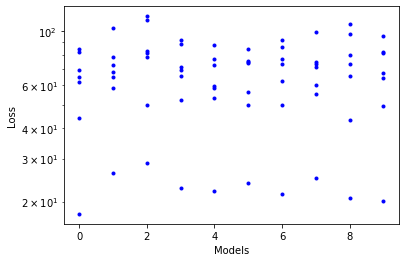

In [47]:
data = esn.Data.create_source('lorenz')

points_to_skip = 300
training_signal_length = 20000
test_length = 500

n_seeds = 7
n_models = 10

seeds = np.random.uniform(size=n_seeds)
loss = np.zeros((n_models, n_seeds))

for i_model in range(n_models):
    model = esn.Reservoir(100, network_type='erdos')
    for i_data in range(n_seeds):        
        x,y = data.generate(points_to_skip + training_signal_length, sampling_step=0.02, seed=0)
        model.fit(x, y, skip=points_to_skip)

        #z = model.predict(x, length=points_to_skip+test_length)     
        #loss[i,0] = esn.utils.loss(y[points_to_skip:(points_to_skip+test_length)], z[points_to_skip:])
        
        seed = seeds[i_data]
        x,y = data.generate(1000, sampling_step=0.02, seed=seed)
        z = model.predict(x, length=points_to_skip+test_length)     
        loss[i_model, i_data] = esn.utils.loss(y[points_to_skip:(points_to_skip+test_length)], z[points_to_skip:])

        print('.', end='')
    print('|', end='')
        
# Visuals
plt.plot(loss, 'b.');
plt.yscale('log')
plt.xlabel('Models');
plt.ylabel('Loss');

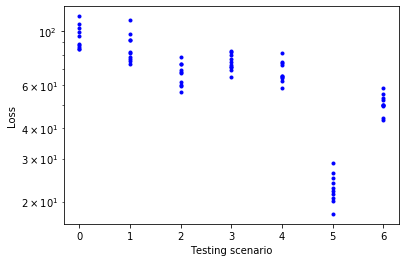

In [48]:
plt.plot(loss.T, 'b.');
plt.yscale('log')
plt.xlabel('Testing scenario');
plt.ylabel('Loss');